In [15]:
from pathlib import Path

import nibabel as nib
import numpy as np

from nipype.interfaces import fsl
from brats.utils import show_mri

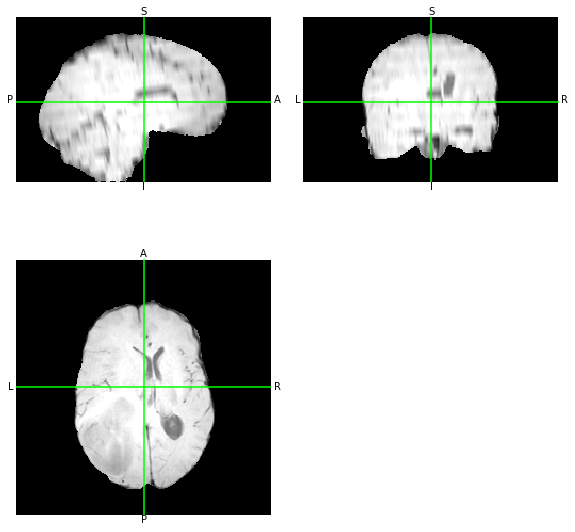

In [41]:
fp = '/data/slow/MICCAI_BraTS2020_TrainingData/BraTS20_Training_333/BraTS20_Training_333_t1.nii.gz'
show_mri(fp, pos=(-120,-120+239,75))

In [43]:
%%time

fastr = fsl.FAST()
fastr.inputs.in_files = fp
fastr.inputs.img_type = 1
fastr.inputs.number_classes = 3
fastr.inputs.out_basename = 'fast_'
out = fastr.run()
out

CPU times: user 183 ms, sys: 59.8 ms, total: 243 ms
Wall time: 1min 59s


In [44]:
out.outputs


bias_field = <undefined>
mixeltype = /home/bruno-pacheco/brain-age/notebooks/fast__mixeltype.nii.gz
partial_volume_files = ['/home/bruno-pacheco/brain-age/notebooks/fast__pve_0.nii.gz', '/home/bruno-pacheco/brain-age/notebooks/fast__pve_1.nii.gz', '/home/bruno-pacheco/brain-age/notebooks/fast__pve_2.nii.gz']
partial_volume_map = /home/bruno-pacheco/brain-age/notebooks/fast__pveseg.nii.gz
probability_maps = <undefined>
restored_image = <undefined>
tissue_class_files = <undefined>
tissue_class_map = /home/bruno-pacheco/brain-age/notebooks/fast__seg.nii.gz

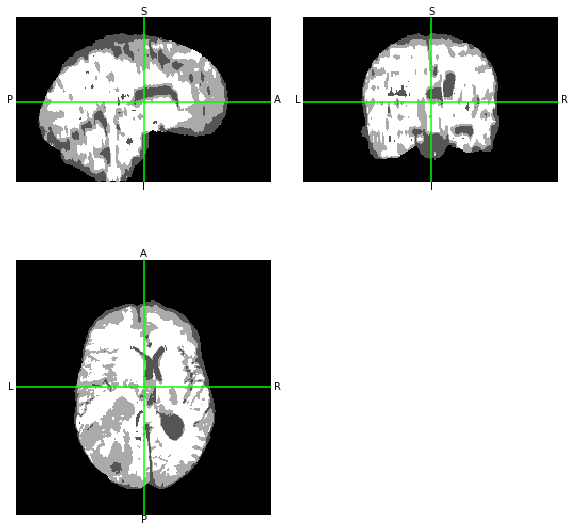

In [46]:
show_mri(out.outputs.tissue_class_map, pos=(-120,-120+239,75))

In [48]:
tcm = nib.load(out.outputs.tissue_class_map).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3.])

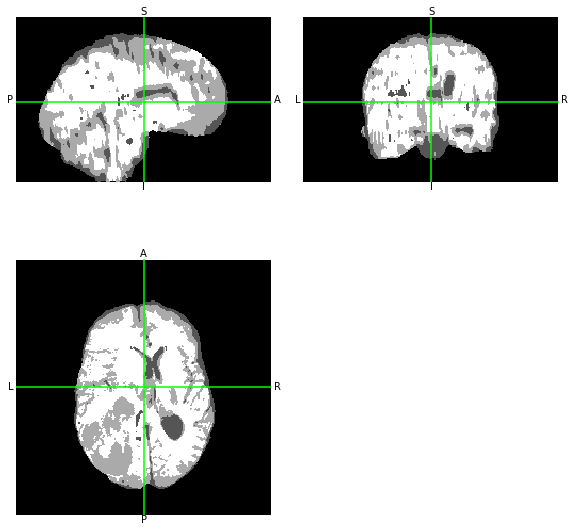

In [47]:
show_mri(out.outputs.partial_volume_map, pos=(-120,-120+239,75))

In [49]:
tcm = nib.load(out.outputs.partial_volume_map).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3.])

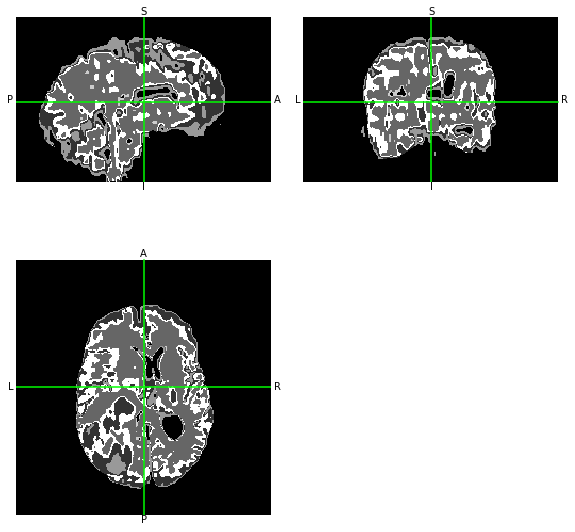

In [50]:
show_mri(out.outputs.mixeltype, pos=(-120,-120+239,75))

In [51]:
tcm = nib.load(out.outputs.mixeltype).get_fdata()
np.unique(tcm.flatten())

array([0., 1., 2., 3., 4., 5.])

# Seg of BraTS2020 data

In [55]:
t1_fpaths = Path('/home/bruno-pacheco/brats-generalization/data/raw/nnUNet_raw_data/Task111_BraTS2020_BrainSeg_T1T2/imagesTr').glob('*_0000.nii.gz')
len(list(t1_fpaths))

369

In [ ]:
for t1_fpath in t1_fpaths:
    fastr = fsl.FAST()
    fastr.inputs.in_files = strt
    fastr.inputs.img_type = 1
    fastr.inputs.number_classes = 3
    fastr.inputs.out_basename = 'fast_'
    out = fastr.run()